In [1]:
import numpy as np
import pandas as pd 
import cv2
from IPython.display import Image
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
print(os.listdir("../input/utkface_aligned_cropped/"))

['crop_part1', 'UTKFace']


In [2]:
def imshow(img):
    plt.imshow(img, interpolation='bicubic')
    plt.xticks([]), plt.yticks([]) 
    plt.show()

In [3]:
onlyfiles = os.listdir("../input/utkface_aligned_cropped/UTKFace")
y = np.array([[[i.split('_')[0]],[i.split('_')[1]]] for i in onlyfiles])
# y = np.array([[i.split('_')[1] for i in onlyfiles]]).T
print(y.shape)
print(y[0])

(23708, 2, 1)
[['1']
 ['1']]


In [4]:
X_data =[]
for file in onlyfiles:
    face = cv2.imread("../input/utkface_aligned_cropped/UTKFace/"+file,cv2.IMREAD_COLOR)
    face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    face =cv2.resize(face, (32,32) )
    X_data.append(face)
X_data=np.array(X_data)
X_data.shape

(23708, 32, 32, 3)

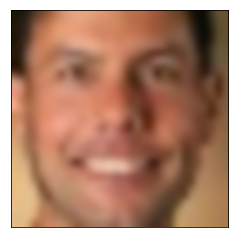

[['37']
 ['0']]


In [7]:
X = np.squeeze(X_data)
imshow(X[1])
print(y[1])

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33)
y_train=[y_train[:,1],y_train[:,0]]
y_valid=[y_valid[:,1],y_valid[:,0]]

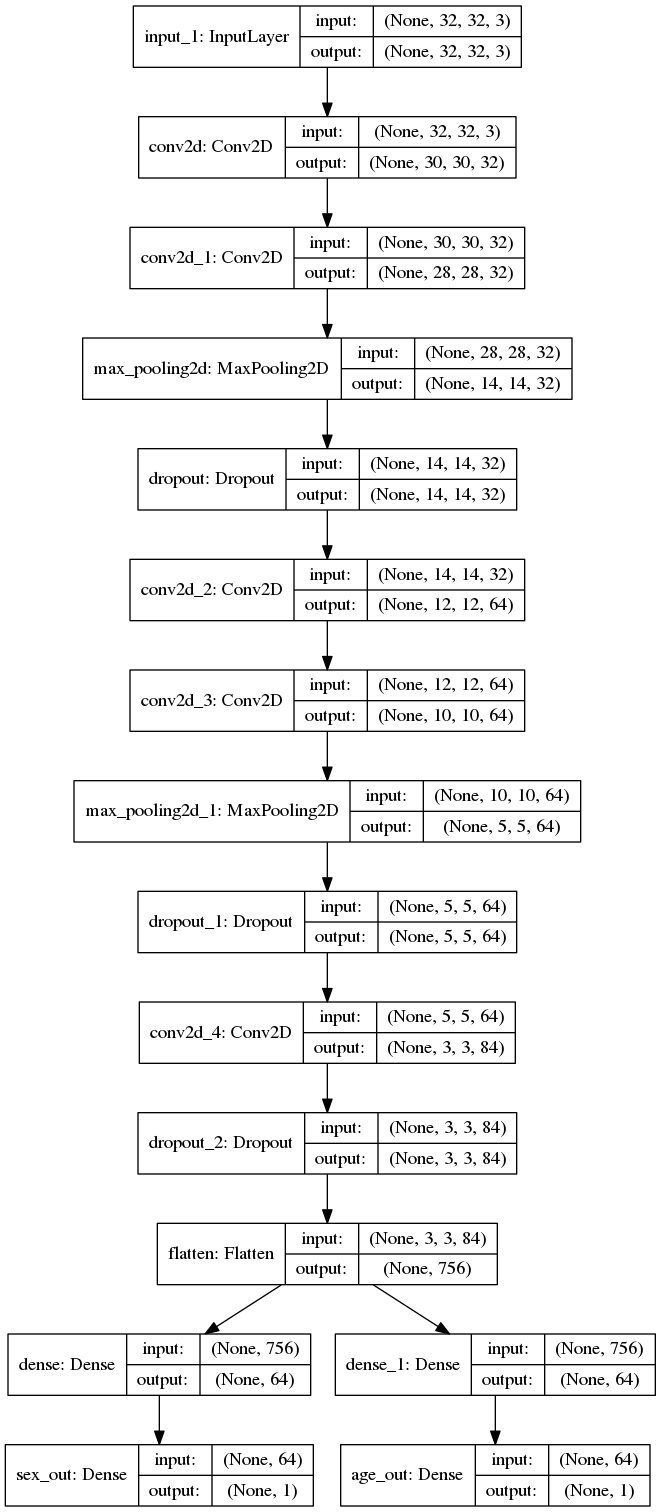

In [9]:

def gen_model():
    inputs = tf.keras.layers.Input(shape=(32, 32, 3))
    x = inputs
    x = layers.Conv2D(32,3,activation='relu')(x)
    x = layers.Conv2D(32,3,activation='relu')(x)
    x = layers.MaxPool2D(2)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Conv2D(64,3,activation='relu')(x)
    x = layers.Conv2D(64,3,activation='relu')(x)
    x = layers.MaxPool2D(2)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Conv2D(84,3,activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Flatten()(x)
    x1 = layers.Dense(64,activation='relu')(x)
    x2 = layers.Dense(64,activation='relu')(x)
    x1 = layers.Dense(1,activation='sigmoid',name='sex_out')(x1)
    x2 = layers.Dense(1,activation='relu',name='age_out')(x2)
    model = tf.keras.models.Model(inputs=inputs, outputs=[x1, x2])
    model.compile(optimizer='Adam', loss=['binary_crossentropy','mae'])
    tf.keras.utils.plot_model(model, 'model.png',show_shapes=True)  
    return model
model=gen_model()

Image('model.png')

In [ ]:
import random
random_id=random.random()
model.summary()
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs/'+str(random_id))
]
model.fit(X_train, y_train, epochs=2000,batch_size=240,validation_data=(X_valid,y_valid),callbacks=callbacks, shuffle=True)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 30, 30, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   9248        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 14, 14, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout (D

In [ ]:
model.save('AgeGenderModel.h5')

In [ ]:
model.evaluate(X_valid,y_valid)

In [ ]:
p_id=2
imshow(X_valid[p_id])
print(y_valid[0][p_id],y_valid[1][p_id])
print(model.predict([[X_valid[p_id]]]))